In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate as spi
import scipy.integrate
from scipy.optimize import fminbound
import matplotlib.ticker as ticker

In [2]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.linewidth'] = 2

In [3]:
@np.vectorize
def approxZ(LB, omega0, omega1, hubble):
    """Internal function to convert a redshift into a lookback time.

    Parameters:
    LB : float
        lookback time in yrs
    omega0 : float
        the matter density parameter (0.3111 Planck 2018)
    omega1 : float
        The dark energy density parameter (0.6889 Planck 2018)
    hubble : float
        the hubble parameter (0.6766 Planck 2018)
    """
    zmin = 1e-8
    zmax = 1000
    ztol = 1e-8
    maxfun = 5000
    f = lambda z : abs(calc_LB(z, omega0, omega1, hubble) - LB)

    z, _, _, _ = fminbound(f, zmin, zmax, maxfun=maxfun, full_output=1, xtol=ztol)
    return z

In [4]:
@np.vectorize
def calc_LB(z, omega0, omega1, hubble):
    '''
    Calculates the lookback time according to Hobbs.

    Parameters:
    z : float
        The redshift at which you want to calculate the lookback
    omega0 : float
        The Matter density parameter (0.3111 Planck 2018)
    omega1 : float
        The dark energy density parameter (0.6889 Planck 2018)
    hubble : float
        The hubble parameters (0.6766 Planck 2018)
    '''
    def func(x):
        E = np.sqrt(omega0*(1+x)**3 + omega1)
        return 1/((1+x)*E)
    # can be simplified by already doing the extra coefficient calculations
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *scipy.integrate.quad(func, 0, z)[0]/(60*60*24*365.2388526*1e9)


In [5]:
h = 0.6766
omega_M = 0.3111
omega_L = 0.6889

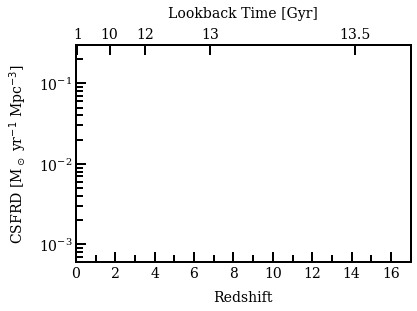

In [7]:
plt.xlim(0, 17)
plt.ylim(6e-4, 3e-1)
plt.yscale('log')
plt.ylabel(r"CSFRD [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()

ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=12))

ax.yaxis.set_tick_params(which='both', right=False)

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax2 = ax.twiny()
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.set_xlim(0, 17)
LB_values = np.array([1, 10, 12, 13, 13.5])
ax2.xaxis.set_major_locator(mpl.ticker.FixedLocator(approxZ(LB_values, omega_M, omega_L, h)))
ax2.set_xticklabels(["1", "10", "12", "13", "13.5"])
ax2.set_xlabel('Lookback Time [Gyr]', labelpad=10)

plt.show()
